  **Prodigy Infotech**

**Machine Learning Internship Tasks**

**Task 2) SVM Classification of Cats & Dogs" by ABU BAKAR SIDDIQ**  

**This is training of Support Vector Machine (SVM) for Image Classification of Cats & Dogs. First, it loads & preprocesses images of Cats & Dogs by resizing & converting them to a machine-readable format. The dataset is split into training & testing sets, This SVM Model is Trained using the training data. After training, the model makes predictions on the test data, and the accuracy of the predictions is calculated using the `accuracy_score` function.**

  **Importing all Necessary Libraires**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Loading DataSet**

In [2]:
DATADIR = "SVM Classification of Cats & Dogs\\PetImages"
CATEGORIES = ["Cat", "Dog"]
IMG_SIZE = 64

**Loading & Preprocessing the Images & Reshaping the Images for SVM Model**

In [ ]:
def create_dataset():
    data = []
    labels = []
    
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category) 
        
        print(f"Loading images from: {path}")
        
        if not os.path.exists(path):
            print(f"Path does not exist: {path}")
            continue
        
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            
            print(f"Processing image: {img_path}")
            
            try:
                img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)  
                if img_array is None:
                    print(f"Image not loaded correctly: {img_path}")
                    continue

                resized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append(resized_img)
                labels.append(class_num)
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
    
    if len(data) == 0:
        raise ValueError("No images were loaded. Check the image paths and formats.")
    
    return np.array(data), np.array(labels)

data, labels = create_dataset()

data = data.reshape(len(data), -1)

**Splitting DataSet into Training & Testing Sets**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

**Normalizing Pixel Values (Scaling B/W 0 & 1)**

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Initializing SVM Classifier**

In [6]:
svm = SVC(kernel='linear', random_state=42)

**Training the Model**

In [7]:
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

**Model Making Predictions on Test DataSet**

In [8]:
y_pred = svm.predict(X_test)

**Evaluating the Model**

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 51.40%


**Displaying Classification Report & Confusion Matrix**

In [10]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.56      0.54       517
           1       0.50      0.46      0.48       485

    accuracy                           0.51      1002
   macro avg       0.51      0.51      0.51      1002
weighted avg       0.51      0.51      0.51      1002

Confusion Matrix:
 [[291 226]
 [261 224]]


**Now `Model Predicting` with `Color Images` Either it's a `Cat or Dog`**

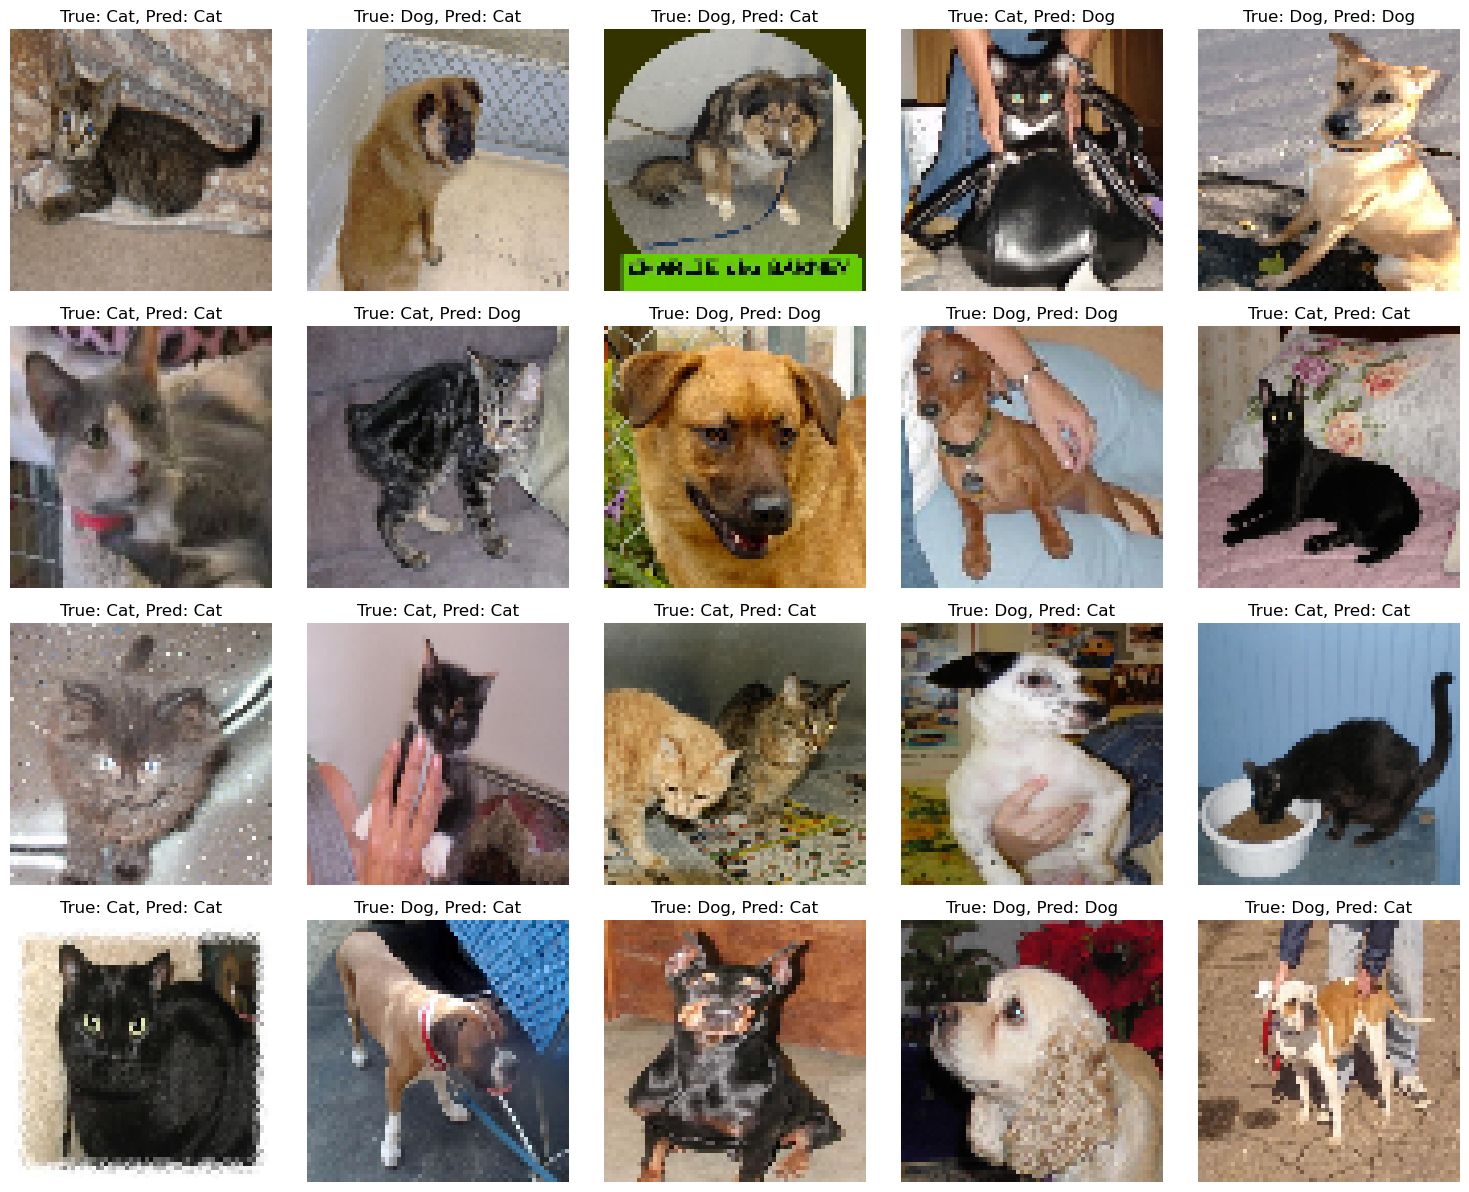

In [11]:
def display_predictions(images, labels, predictions, n=20):  # Change n to 20 or 25 as needed
    plt.figure(figsize=(15, 15))  # Adjust the figure size to accommodate more images
    for i in range(n):
        idx = np.random.randint(0, len(images))
        img = images[idx].reshape(IMG_SIZE, IMG_SIZE, 3)  # Reshape to 64x64x3 for color image
        img = img * 255.0  # Undo normalization for displaying purposes
        img = img.astype(np.uint8)  # Convert to unsigned int for displaying
        
        plt.subplot(5, 5, i + 1)  # Change to 5x5 for 25 images, or 4x5 for 20 images
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        plt.title(f"True: {CATEGORIES[labels[idx]]}, Pred: {CATEGORIES[predictions[idx]]}")
        plt.axis('off') 
    plt.tight_layout()
    plt.show()

# Reshape test images back to original size for visualization (64x64x3)
X_test_images = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# Display some predictions
display_predictions(X_test_images, y_test, y_pred, n=20)  # You can change n=25 to predict 25 images
